In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler

from sklearn import naive_bayes

from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import PredefinedSplit, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

from xgboost import XGBClassifier
from xgboost import plot_importance

In [2]:
df = pd.read_csv("D:\cases\loan_data.csv")

In [3]:
df.head()

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [7]:
category_cols = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

for col in category_cols:
    print(df[col].value_counts(normalize=True))
    print('')

person_gender
male      0.552022
female    0.447978
Name: proportion, dtype: float64

person_education
Bachelor       0.297756
Associate      0.267289
High School    0.266044
Master         0.155111
Doctorate      0.013800
Name: proportion, dtype: float64

person_home_ownership
RENT        0.520956
MORTGAGE    0.410867
OWN         0.065578
OTHER       0.002600
Name: proportion, dtype: float64

loan_intent
EDUCATION            0.203400
MEDICAL              0.189956
VENTURE              0.173756
PERSONAL             0.167822
DEBTCONSOLIDATION    0.158778
HOMEIMPROVEMENT      0.106289
Name: proportion, dtype: float64

previous_loan_defaults_on_file
Yes    0.507956
No     0.492044
Name: proportion, dtype: float64



In [8]:
df.describe()

person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   
25%         8.590000             0.070000                    3.000000   
50%        11.010000             0.120000                    4.000000   
75%        12.990000             0.190000                    8.000000   
max        20.000000             0.660000                   30.000000   

       credit_score   loan_status  
count  45000.000000  45000.000000  
mean     632.608756      0.222222  
std       50.435865      0.415744  
min      390.000000      0.000000  
25%      601.000000      0.000000  
50%      640.000000      0.000000  
75%      670.000000      0.000000  
max      850.000000      1.000000

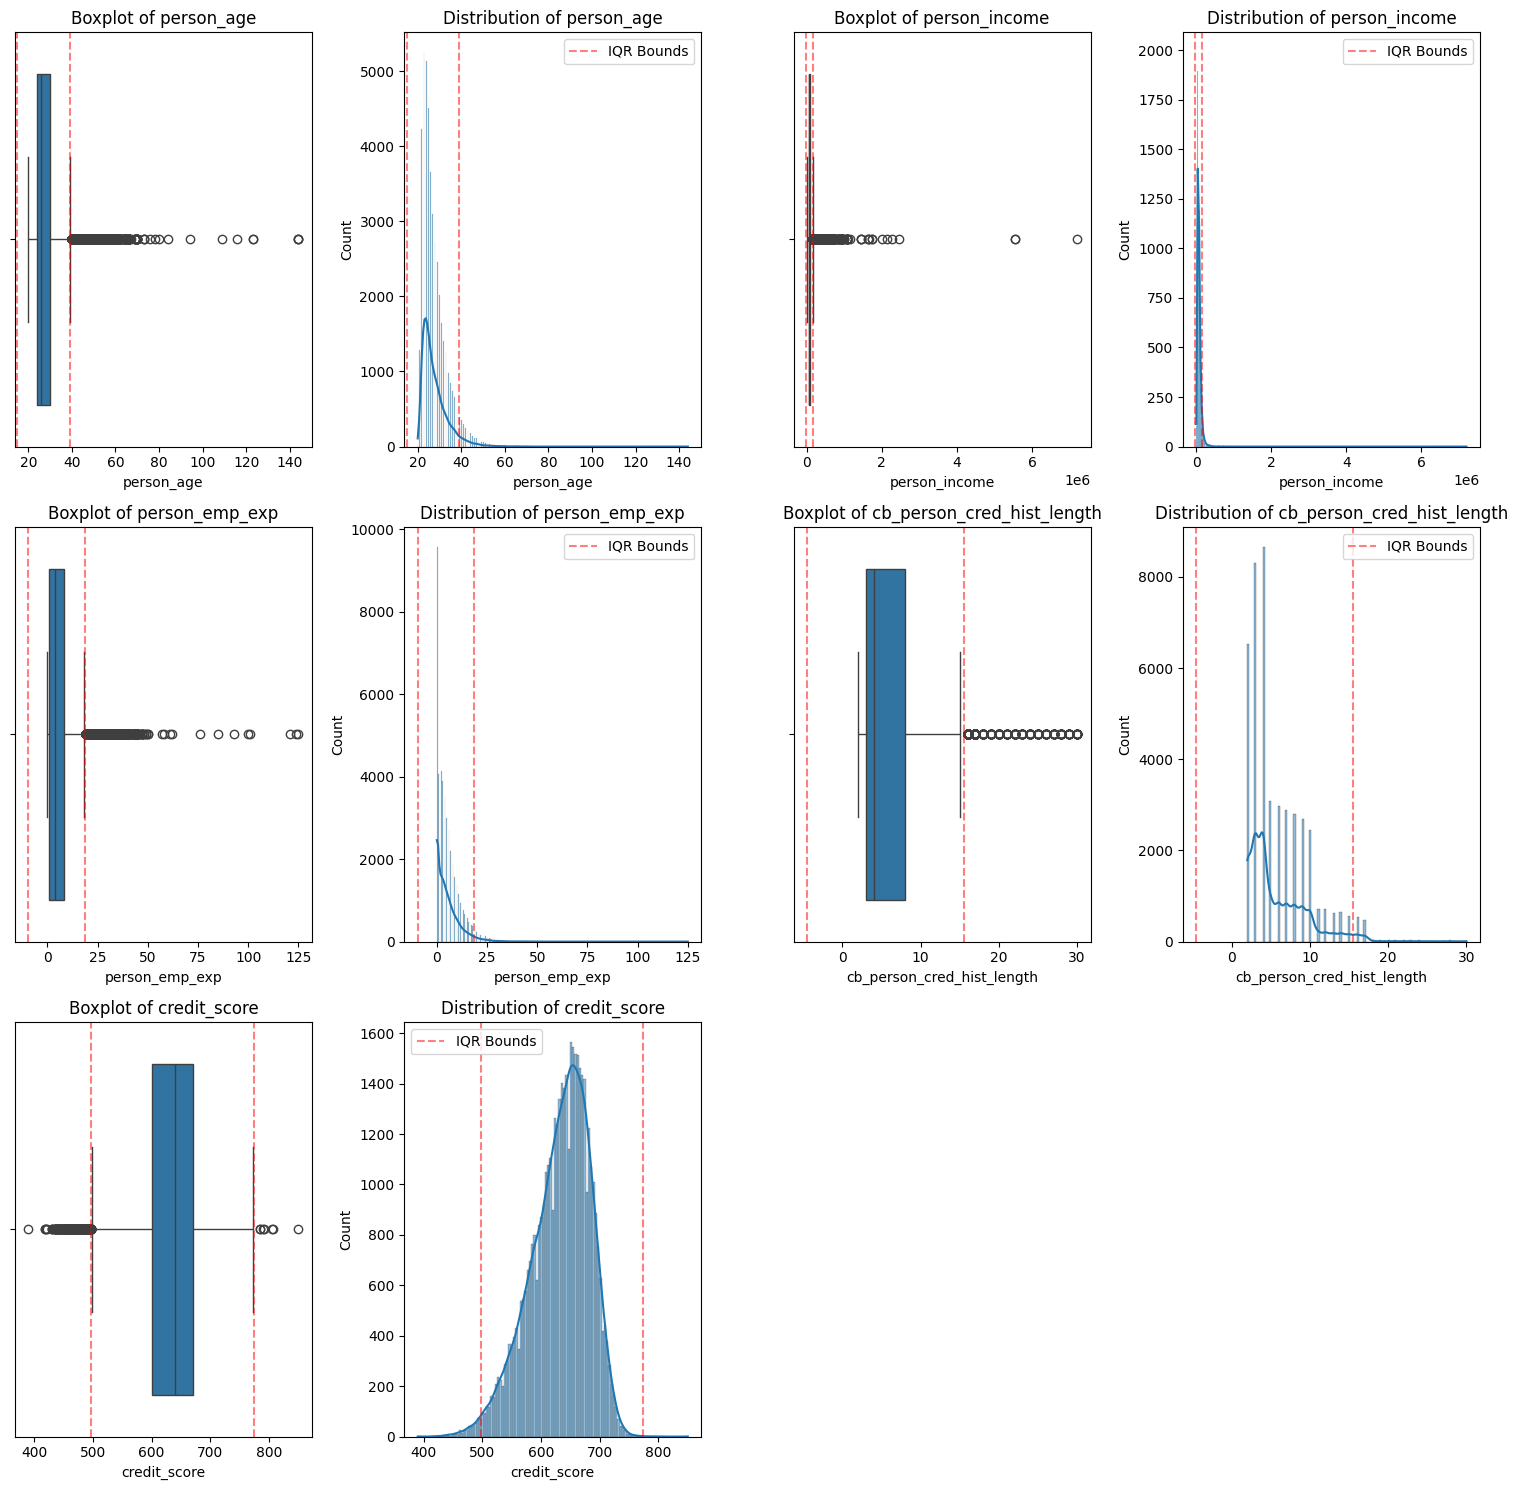


Outlier Detection Summary:
                       Column  Total_Outliers  Percentage_Outliers  \
0                  person_age            2188                 4.86   
1               person_income            2218                 4.93   
2              person_emp_exp            1724                 3.83   
3  cb_person_cred_hist_length            1366                 3.04   
4                credit_score             467                 1.04   

   Lower_Bound  Upper_Bound  
0        15.00        39.00  
1    -25673.88    168667.12  
2        -9.50        18.50  
3        -4.50        15.50  
4       497.50       773.50  


In [9]:
#Outlier detection for demographic
demographic_cols = ['person_age', 'person_income', 'person_emp_exp', 'cb_person_cred_hist_length', 'credit_score']
loan_cols = ['loan_amnt', 'loan_int_rate', 'loan_percent_income']

def plot_multiple_columns_outliers(df, columns, results):
    # Calculate number of rows needed for the grid
    n_columns = len(columns)
    n_rows = (n_columns + 1) // 2  # Round up division
    
    # Create subplot grid
    fig = plt.figure(figsize=(15, 5 * n_rows))
    
    for idx, column in enumerate(columns):
        # Create boxplot
        plt.subplot(n_rows, 4, 2*idx + 1)
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')
        plt.axvline(x=results[column]['lower_bound'], color='r', linestyle='--', alpha=0.5)
        plt.axvline(x=results[column]['upper_bound'], color='r', linestyle='--', alpha=0.5)
        
        # Create histogram
        plt.subplot(n_rows, 4, 2*idx + 2)
        sns.histplot(data=df[column], kde=True)
        plt.axvline(x=results[column]['lower_bound'], color='r', linestyle='--', alpha=0.5, 
                   label='IQR Bounds')
        plt.axvline(x=results[column]['upper_bound'], color='r', linestyle='--', alpha=0.5)
        plt.title(f'Distribution of {column}')
        plt.legend()
        
    plt.tight_layout()
    return fig

def detect_outliers_iqr(df, columns):
    results = {}
    
    for column in columns:
        # Calculate Q1, Q3, and IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        
        # Store results
        results[column] = {
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'outlier_indices': outliers.index.tolist(),
            'outlier_values': outliers.values.tolist(),
            'n_outliers': len(outliers),
            'percentage_outliers': (len(outliers) / len(df)) * 100
        }
    
    return results

demographic = detect_outliers_iqr(df, demographic_cols)
plot_multiple_columns_outliers(df, demographic_cols, demographic)
plt.show()
    
# Print summary
summary = pd.DataFrame({
    'Column': demographic_cols,
    'Total_Outliers': [demographic[col]['n_outliers'] for col in demographic_cols],
    'Percentage_Outliers': [round(demographic[col]['percentage_outliers'], 2) for col in demographic_cols],
    'Lower_Bound': [round(demographic[col]['lower_bound'], 2) for col in demographic_cols],
    'Upper_Bound': [round(demographic[col]['upper_bound'], 2) for col in demographic_cols]
})
print("\nOutlier Detection Summary:")
print(summary)

In [10]:
#Cap the outliers of demographic
df1 = df

for col in demographic_cols:
    df1[col] = np.where(df1[col] < demographic[col]['lower_bound'], demographic[col]['lower_bound'], 
                        np.where(df1[col] > demographic[col]['upper_bound'], demographic[col]['upper_bound'], df1[col]))

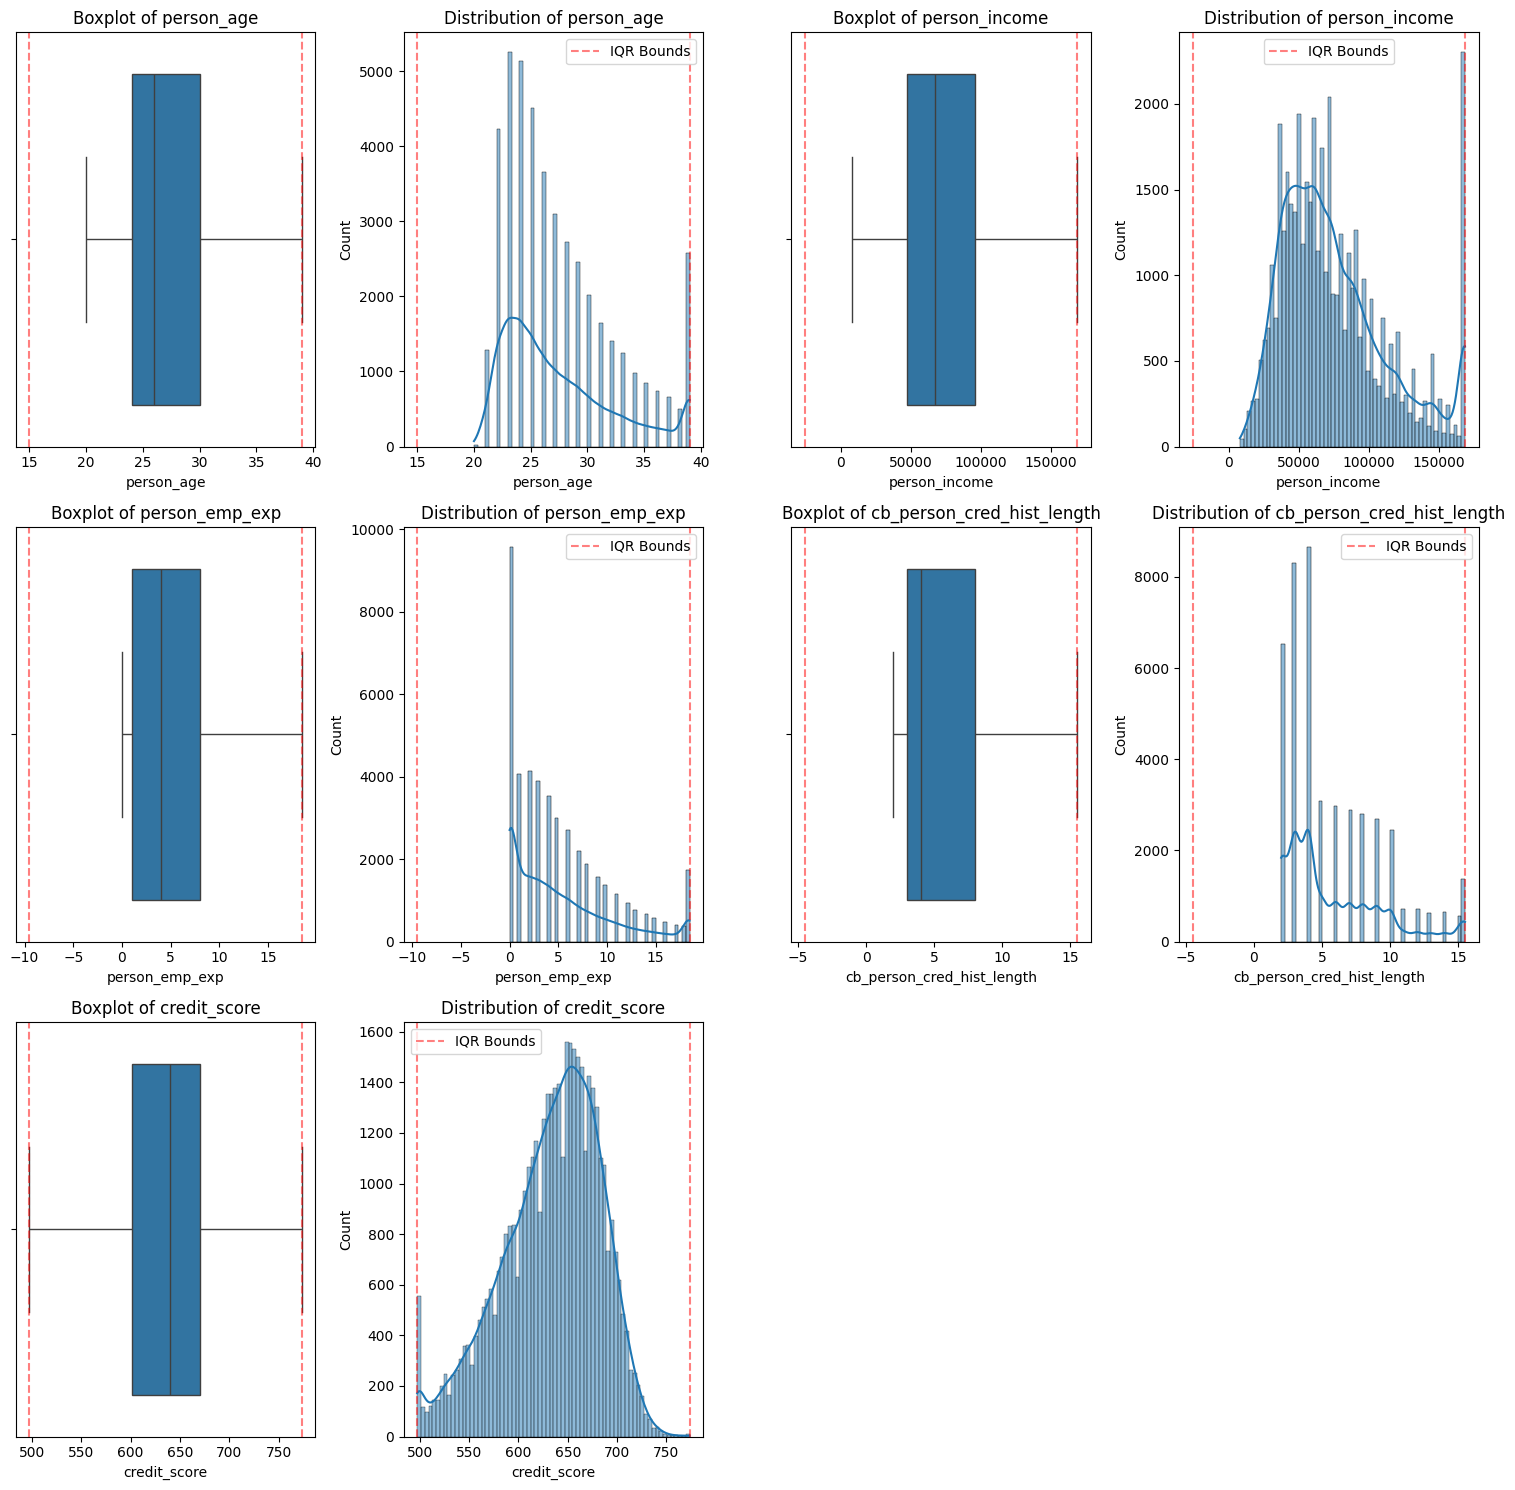

Orgiginal median
person_age                       26.0
person_income                 67048.0
person_emp_exp                    4.0
cb_person_cred_hist_length        4.0
credit_score                    640.0
dtype: float64

Later median
person_age                       26.0
person_income                 67048.0
person_emp_exp                    4.0
cb_person_cred_hist_length        4.0
credit_score                    640.0
dtype: float64

Original mean
person_age                       27.444733
person_income                 75677.400428
person_emp_exp                    5.170311
cb_person_cred_hist_length        5.783711
credit_score                    632.808300
dtype: float64

Later mean
person_age                       27.444733
person_income                 75677.400428
person_emp_exp                    5.170311
cb_person_cred_hist_length        5.783711
credit_score                    632.808300
dtype: float64


In [11]:
#Check
demographic_check = detect_outliers_iqr(df1, demographic_cols)
plot_multiple_columns_outliers(df1, demographic_cols, demographic_check)
plt.show()

print('Orgiginal median')
print(df[demographic_cols].median())
print('')

print('Later median')
print(df1[demographic_cols].median())
print('')

print('Original mean')
print(df[demographic_cols].mean())
print('')

print('Later mean')
print(df1[demographic_cols].mean())

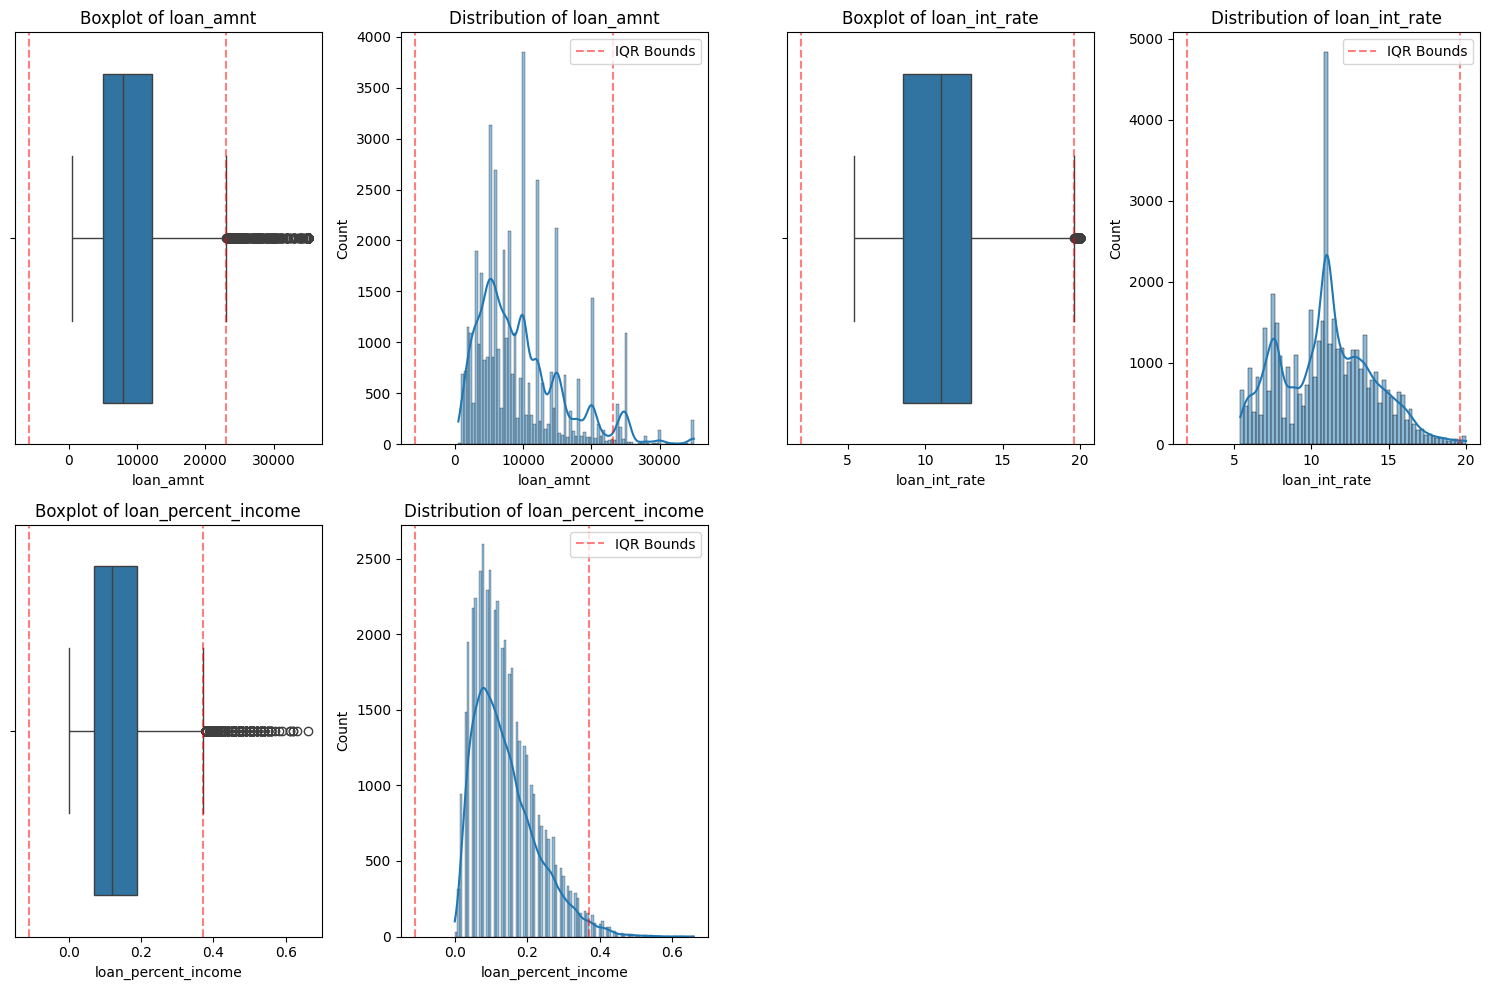


Outlier Detection Summary:
                Column  Total_Outliers  Percentage_Outliers  Lower_Bound  \
0            loan_amnt            2348                 5.22     -5855.88   
1        loan_int_rate             124                 0.28         1.99   
2  loan_percent_income             744                 1.65        -0.11   

   Upper_Bound  
0     23093.12  
1        19.59  
2         0.37  


In [12]:
#Outlier detection for loan info
loan = detect_outliers_iqr(df, loan_cols)
plot_multiple_columns_outliers(df, loan_cols, loan)
plt.show()
    
# Print summary
summary = pd.DataFrame({
    'Column': loan_cols,
    'Total_Outliers': [loan[col]['n_outliers'] for col in loan_cols],
    'Percentage_Outliers': [round(loan[col]['percentage_outliers'], 2) for col in loan_cols],
    'Lower_Bound': [round(loan[col]['lower_bound'], 2) for col in loan_cols],
    'Upper_Bound': [round(loan[col]['upper_bound'], 2) for col in loan_cols]
})
print("\nOutlier Detection Summary:")
print(summary)

In [13]:
#Cap the outliers of loan info
for col in loan_cols:
    df1[col] = np.where(df1[col] < loan[col]['lower_bound'], loan[col]['lower_bound'], 
                        np.where(df1[col] > loan[col]['upper_bound'], loan[col]['upper_bound'], df1[col]))

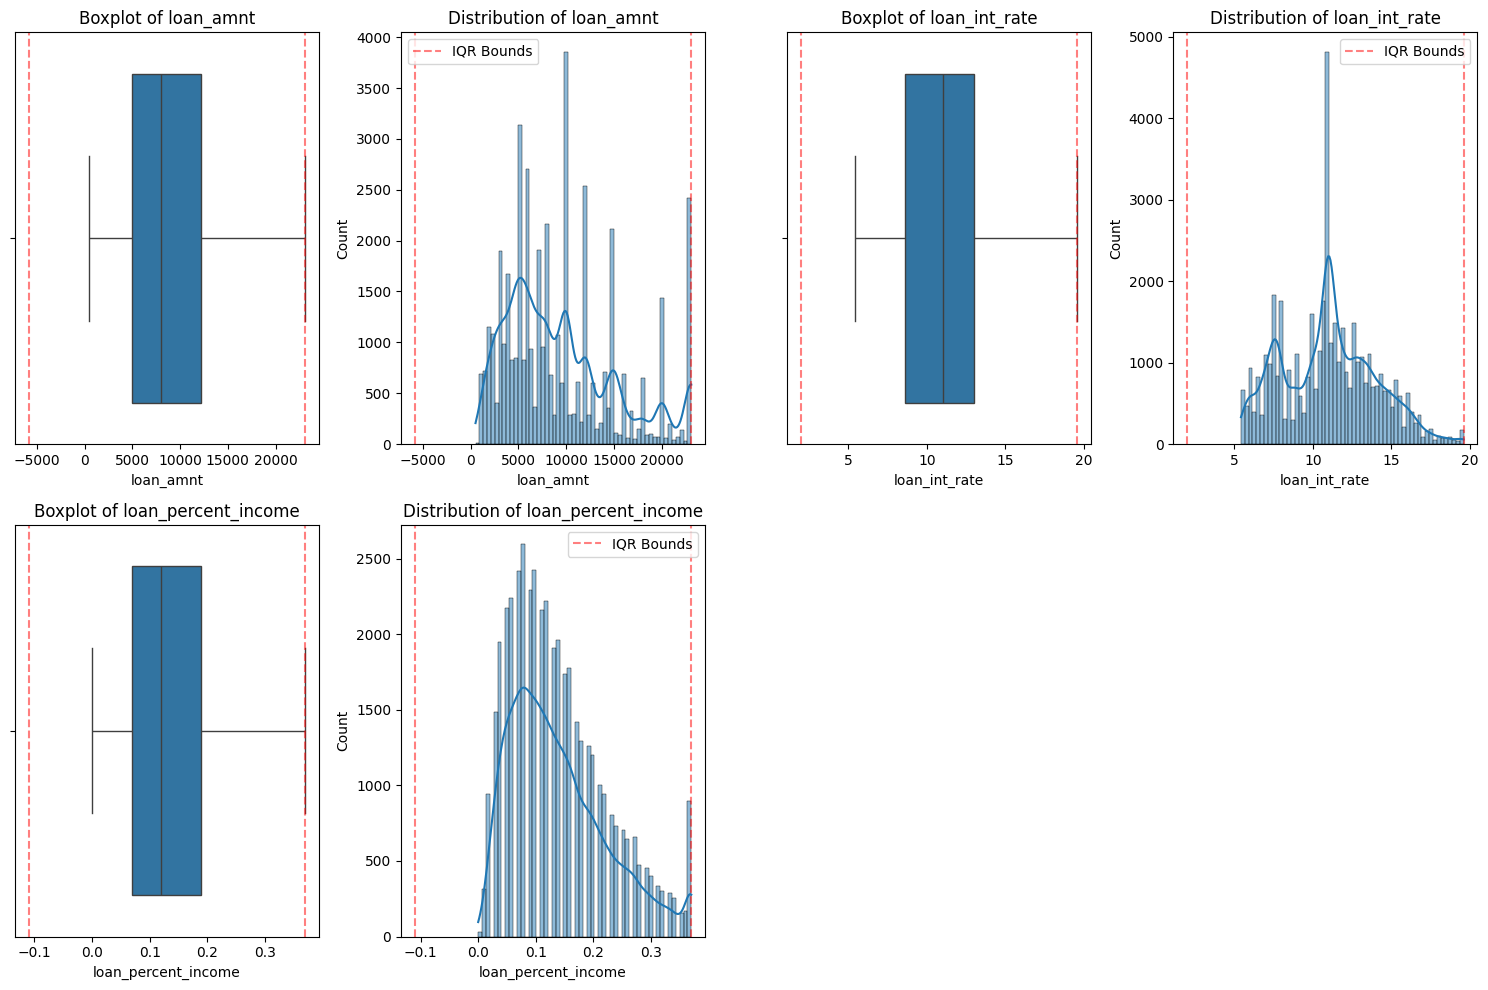

Orgiginal median
loan_amnt              8000.00
loan_int_rate            11.01
loan_percent_income       0.12
dtype: float64

Later median
loan_amnt              8000.00
loan_int_rate            11.01
loan_percent_income       0.12
dtype: float64

Original mean
loan_amnt              9411.042900
loan_int_rate            11.005676
loan_percent_income       0.138842
dtype: float64

Later mean
loan_amnt              9411.042900
loan_int_rate            11.005676
loan_percent_income       0.138842
dtype: float64


In [14]:
#Check
loan_check = detect_outliers_iqr(df1, loan_cols)
plot_multiple_columns_outliers(df1, loan_cols, loan_check)
plt.show()

print('Orgiginal median')
print(df[loan_cols].median())
print('')

print('Later median')
print(df1[loan_cols].median())
print('')

print('Original mean')
print(df[loan_cols].mean())
print('')

print('Later mean')
print(df1[loan_cols].mean())

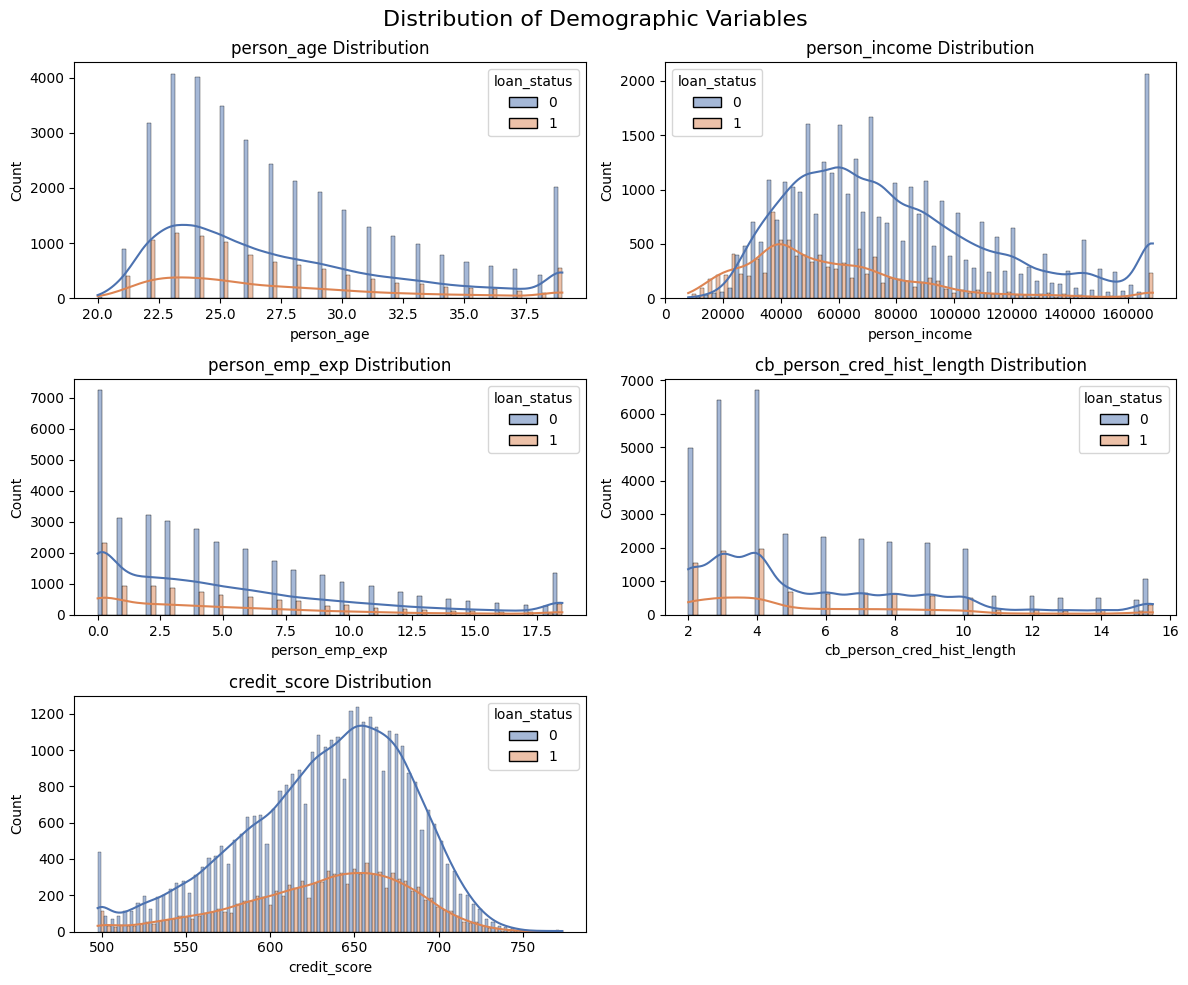

In [15]:
fig, axes = plt.subplots(3, 2, figsize = (12,10))
fig.suptitle('Distribution of Demographic Variables', fontsize=16)
        
axes = axes.flatten()

for i, col in enumerate(demographic_cols):
    sns.histplot(data=df1, x=col, kde=True, ax=axes[i], hue = 'loan_status', multiple = 'dodge', palette = 'deep')
    axes[i].set_title(f'{col} Distribution')

axes[-1].axis('off')

plt.tight_layout()
plt.show()

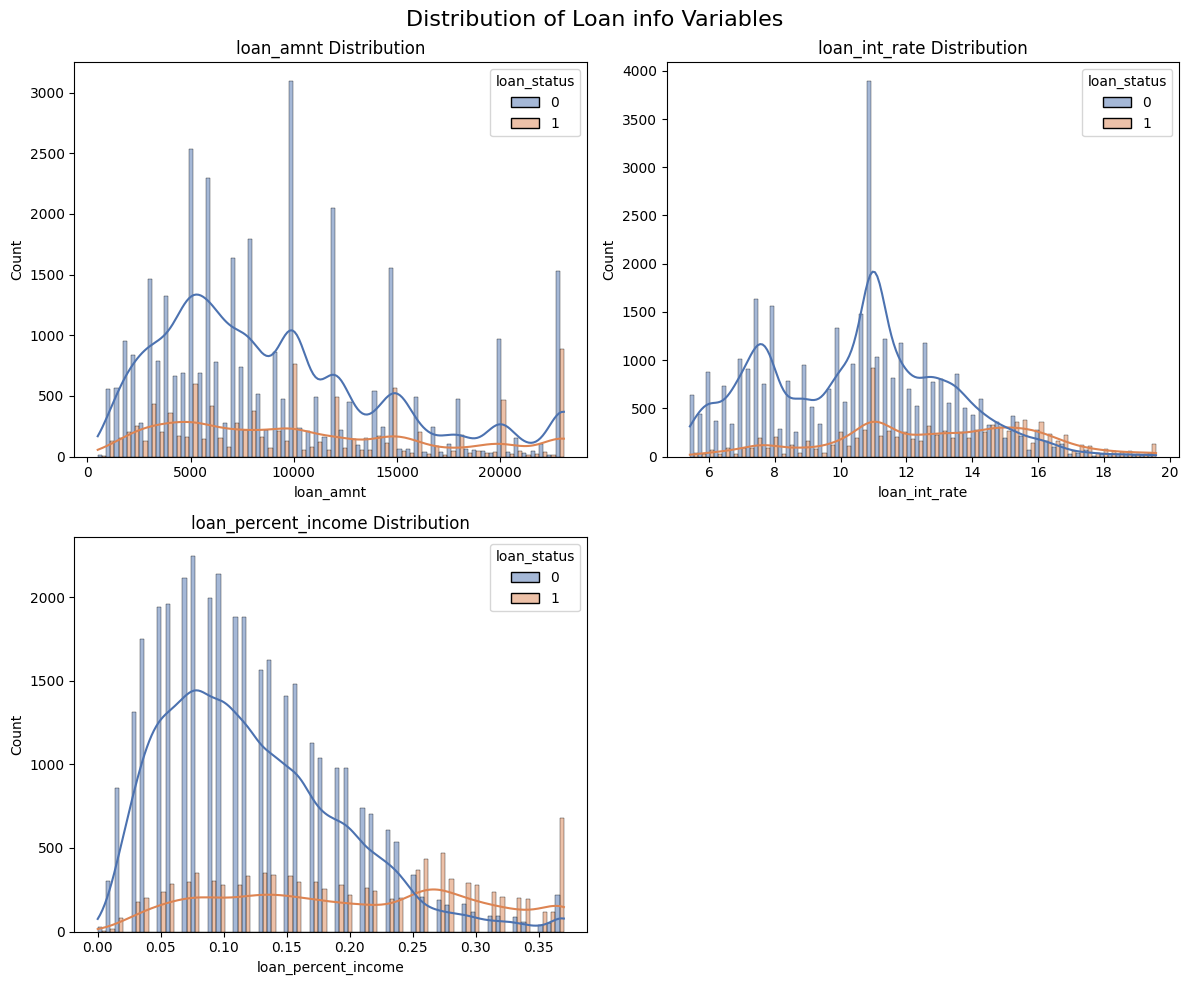

In [16]:
fig, axes = plt.subplots(2, 2, figsize = (12,10))
fig.suptitle('Distribution of Loan info Variables', fontsize=16)
        
axes = axes.flatten()

for i, col in enumerate(loan_cols):
    sns.histplot(data=df1, x=col, kde=True, ax=axes[i], hue = 'loan_status', multiple = 'dodge', palette = 'deep')
    axes[i].set_title(f'{col} Distribution')

axes[-1].axis('off')

plt.tight_layout()
plt.show()

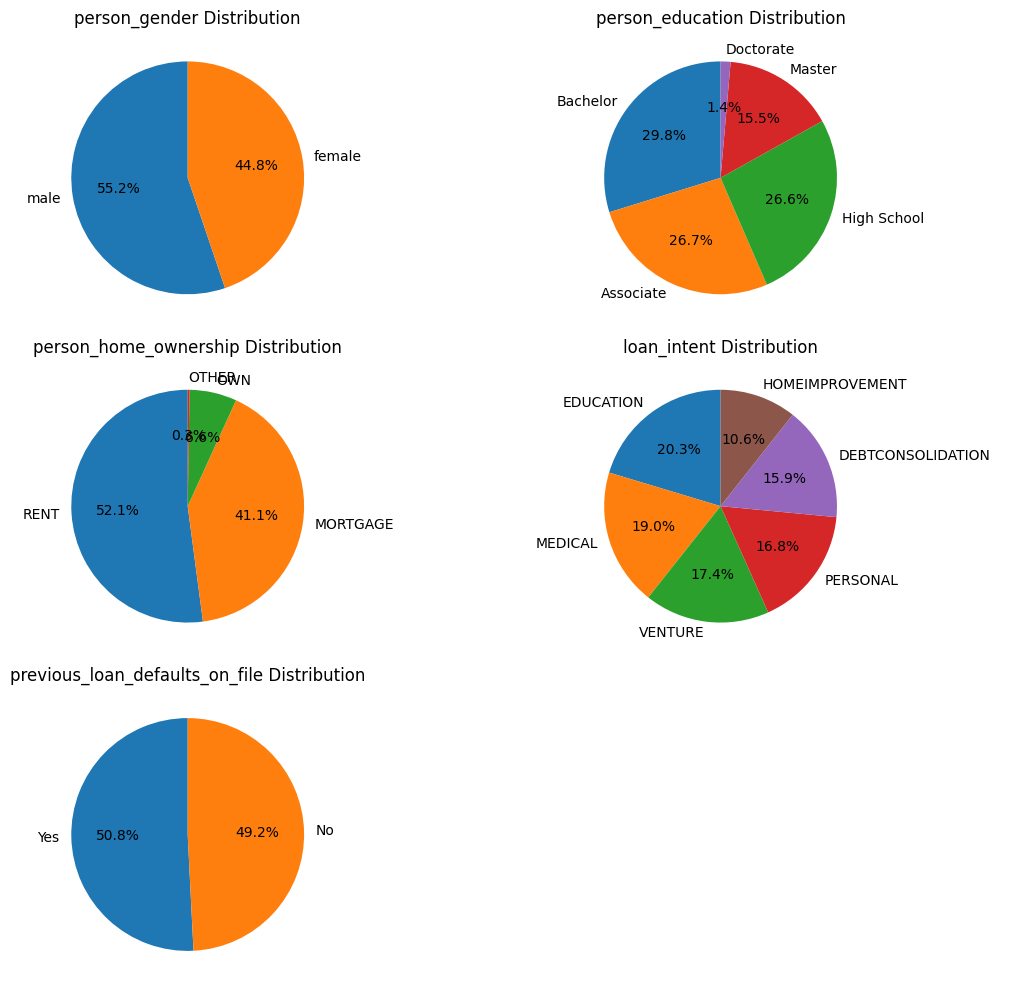

In [17]:
#pie chart for category columns
fig, axes = plt.subplots(3, 2, figsize=(12, 10))  # 1 row, 5 columns

axes = axes.flatten()

# Iterate through each category column and create a pie chart
for i, col in enumerate(category_cols):
    value_counts = df1[col].value_counts()  # Get value counts for the column
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{col} Distribution')

axes[-1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

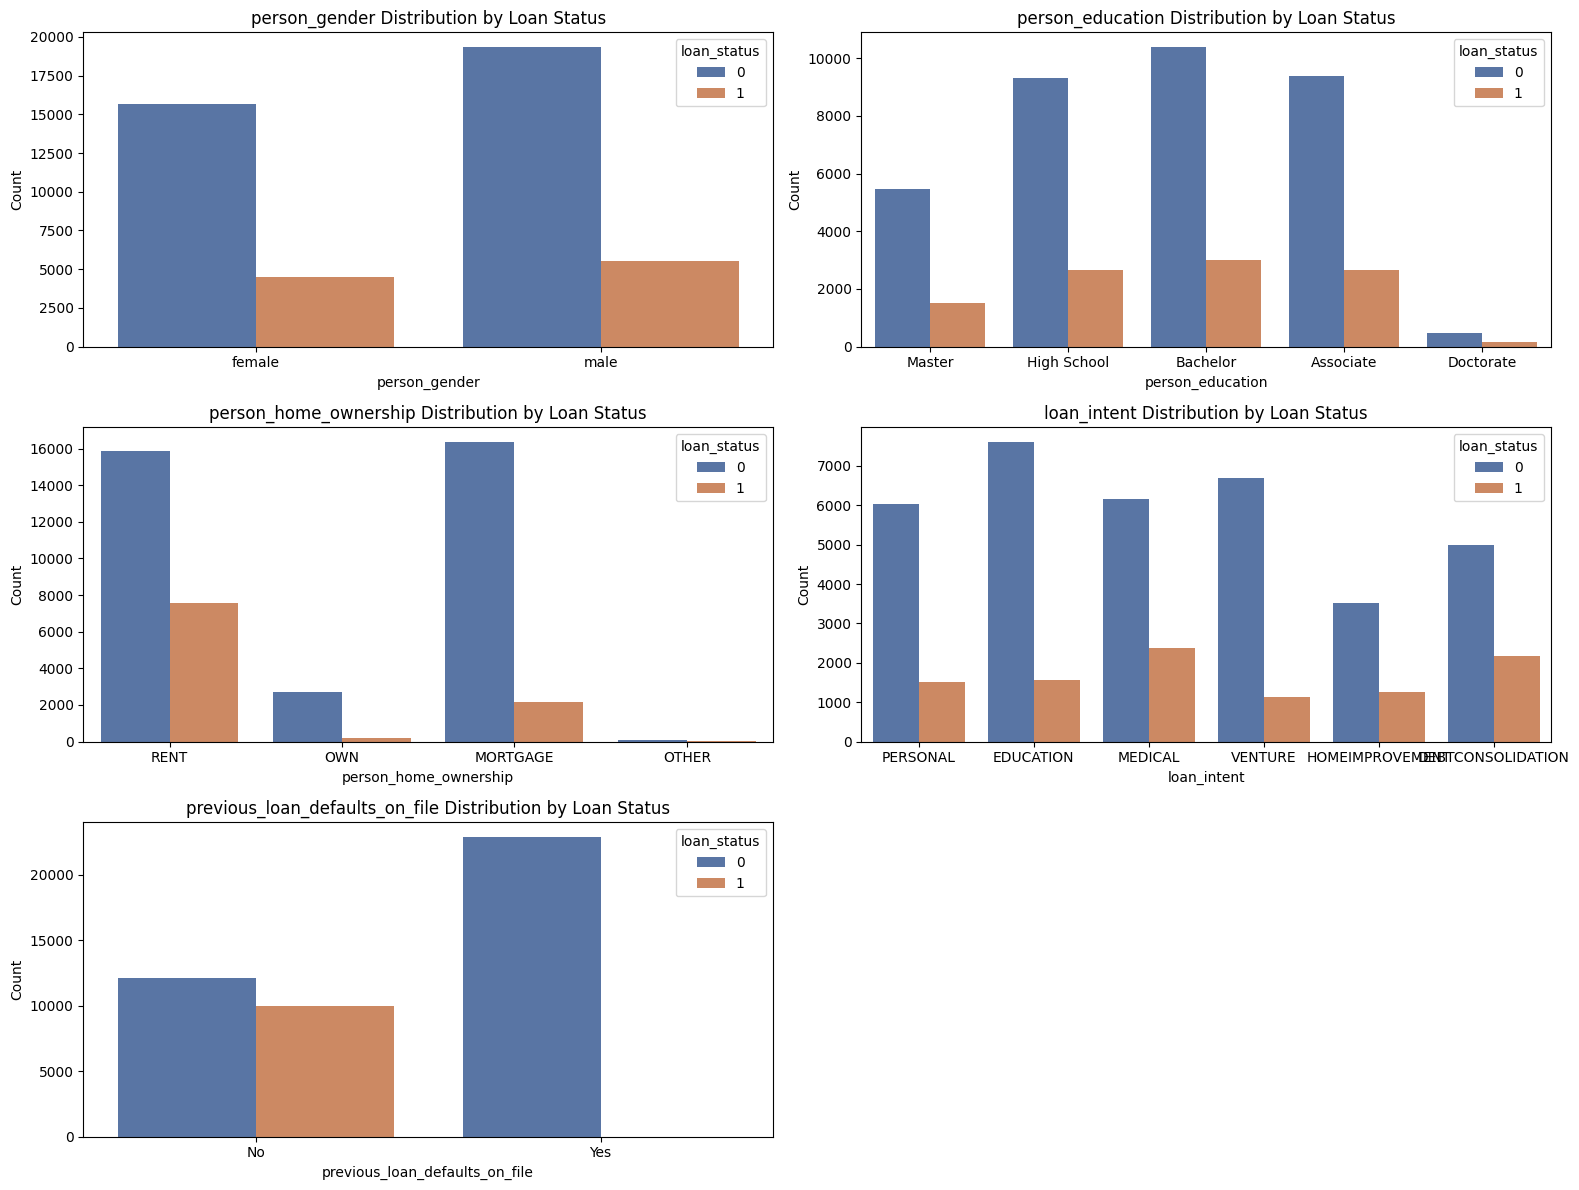

In [18]:
#bar plot for category
fig, axes = plt.subplots(3, 2, figsize=(16, 12))  # 3 rows, 2 columns
axes = axes.flatten()  # Flatten the axes for easier iteration

# Plot each categorical column
for i, col in enumerate(category_cols):
    sns.countplot(data=df, x=col, hue='loan_status', ax=axes[i], palette='deep')
    axes[i].set_title(f'{col} Distribution by Loan Status')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove the empty subplot (if there are 5 plots and 6 spaces)
fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()
plt.show()

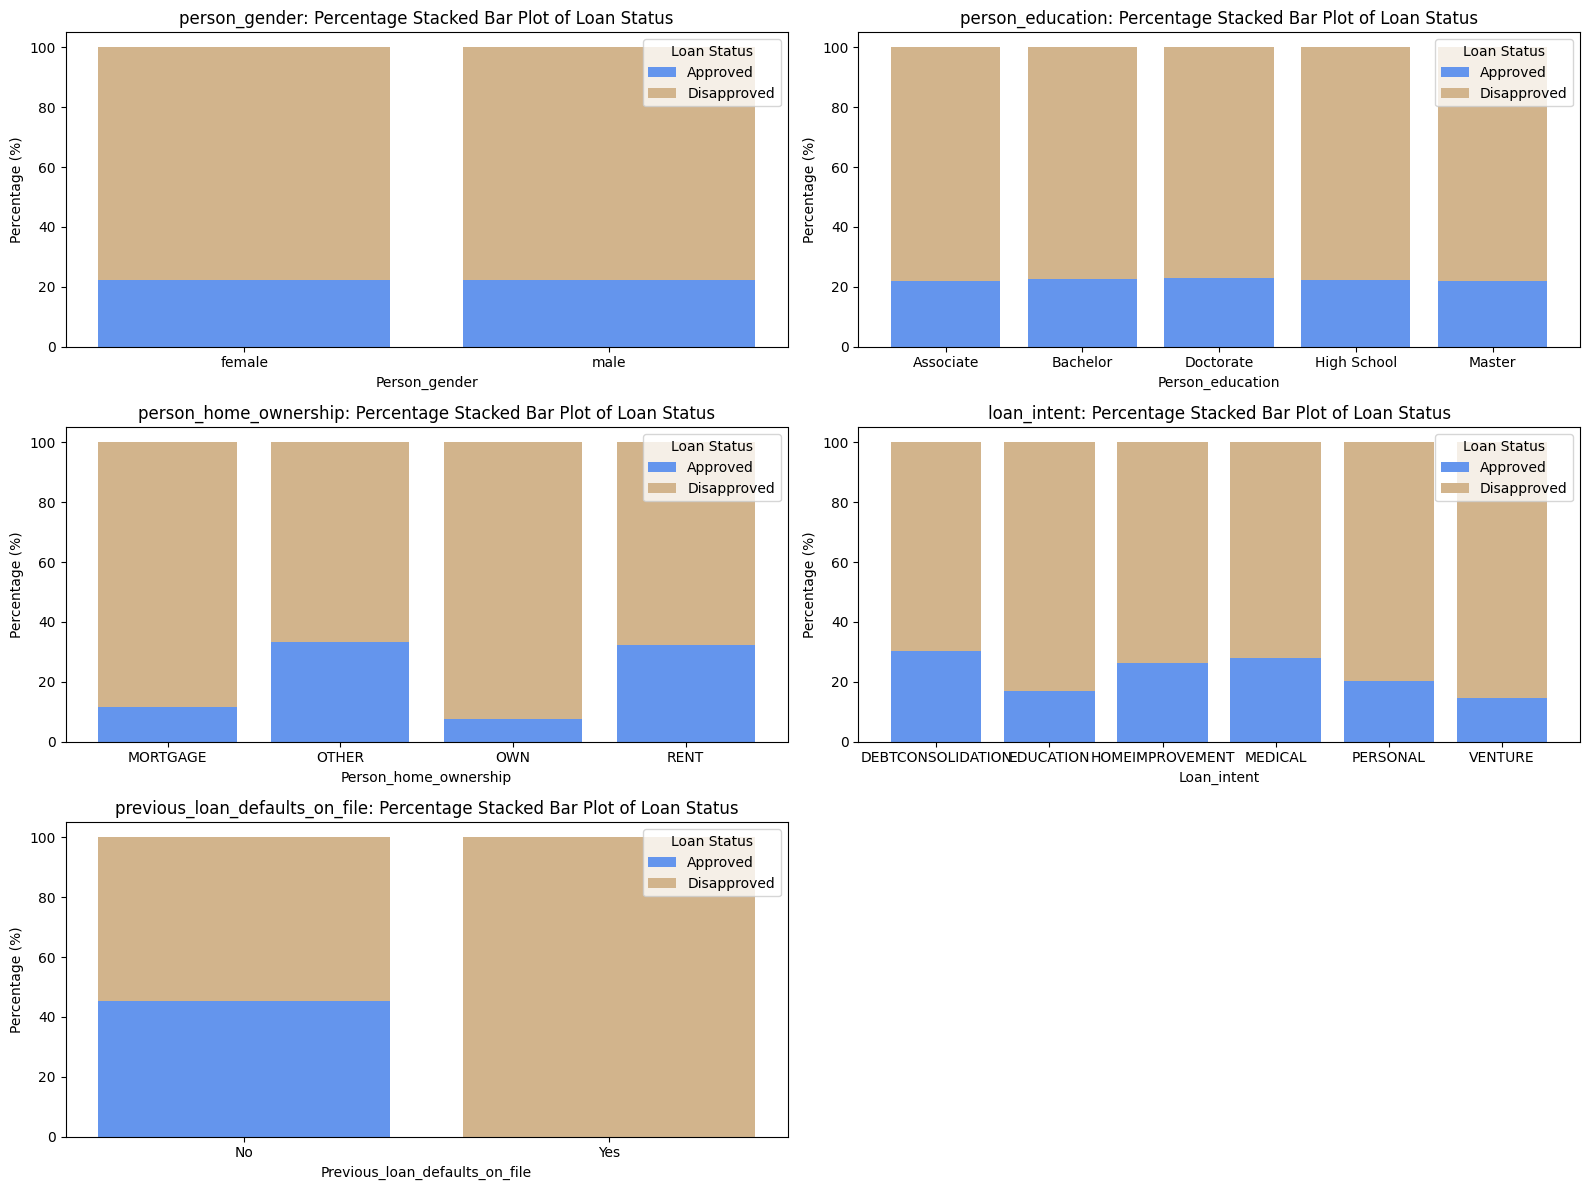

In [19]:
fig, axes = plt.subplots(3, 2, figsize=(16, 12))  # 3 rows, 2 columns
axes = axes.flatten()  # Flatten axes for easier indexing

# Iterate through each categorical column
for i, col in enumerate(category_cols):
    # Aggregate data
    total = (
        df1.groupby(col)
        .agg(
            total_entries=(col, 'count'),  # Total number of entries for each category
            loan_status_1=('loan_status', lambda x: (x == 1).sum())  # Count where loan_status == 1
        )
        .reset_index()
    )
    total['ratio'] = total['loan_status_1'] / total['total_entries'] * 100
    total["loan_status_0_ratio"] = 100 - total["ratio"]

    # Stacked bar plot
    axes[i].bar(total[col], total["ratio"], label="Approved", color="cornflowerblue")
    axes[i].bar(total[col], total["loan_status_0_ratio"], bottom=total["ratio"], label="Disapproved", color="tan")

    # Add labels and title
    axes[i].set_title(f"{col}: Percentage Stacked Bar Plot of Loan Status", fontsize=12)
    axes[i].set_ylabel("Percentage (%)")
    axes[i].set_xlabel(col.capitalize())
    axes[i].legend(title="Loan Status")

# Remove the empty subplot (if the number of columns is less than subplots)
fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()
plt.show()


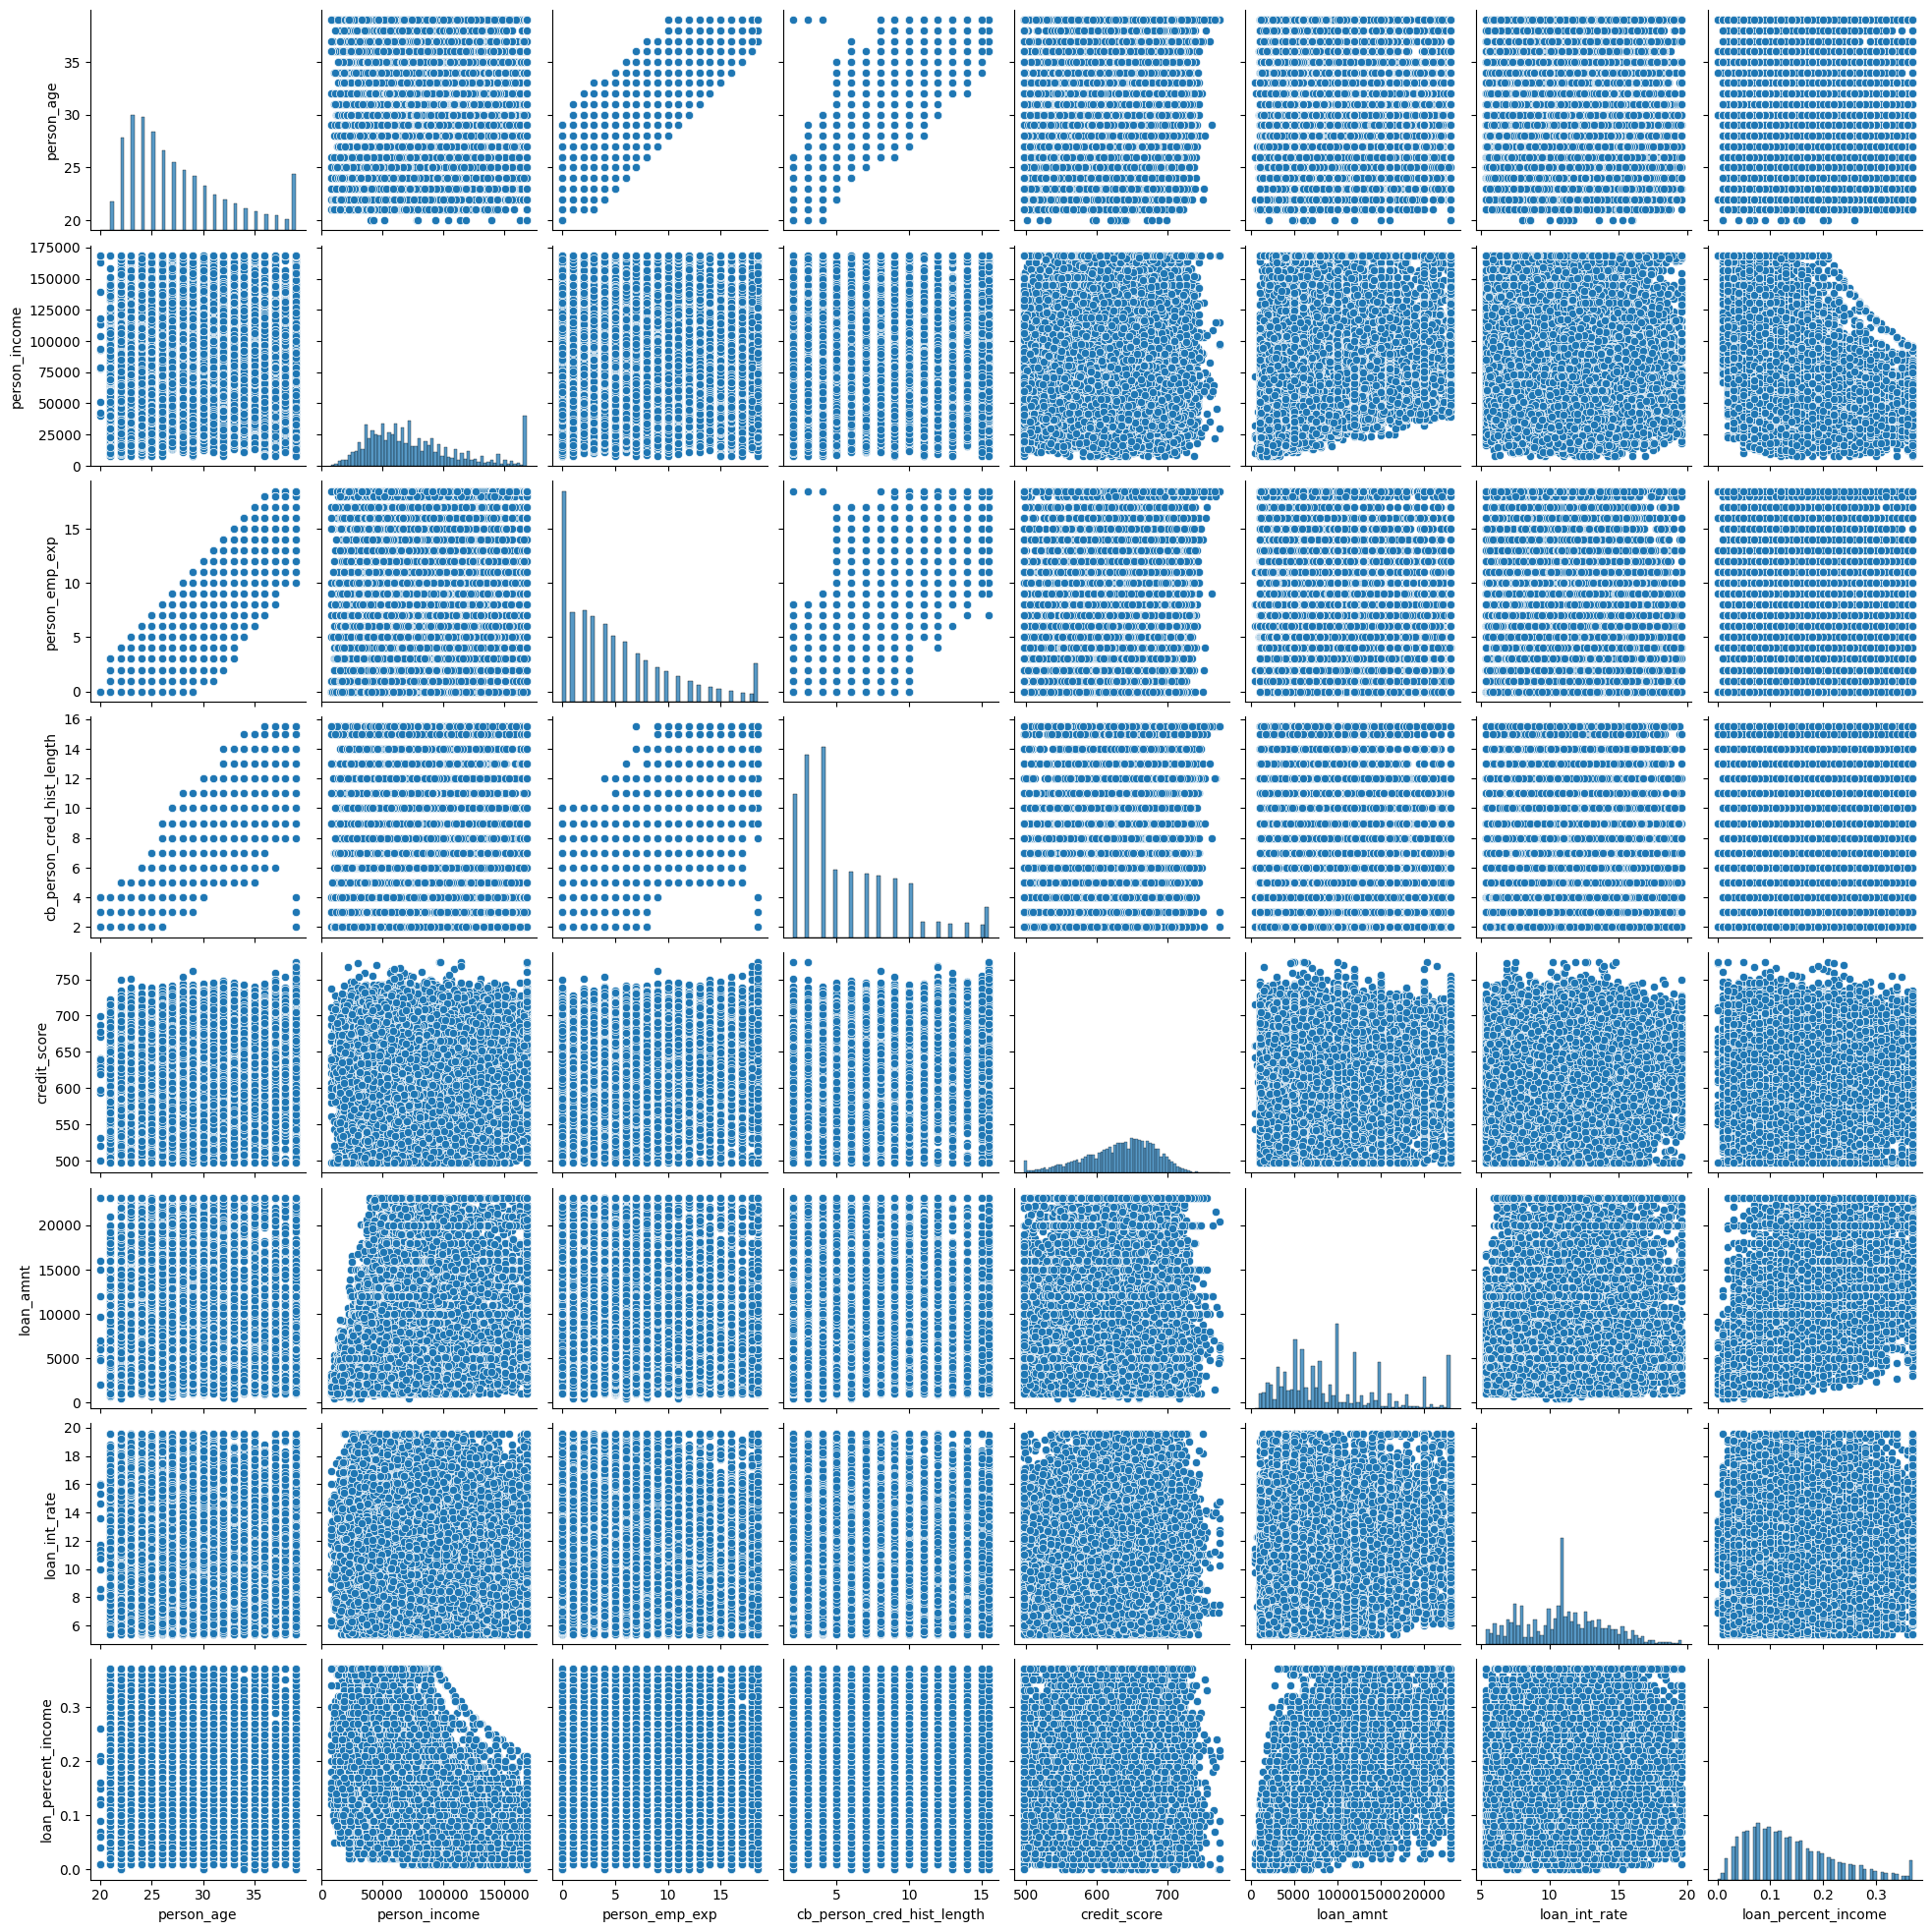

In [20]:
num_cols = ['person_age', 'person_income', 'person_emp_exp', 'cb_person_cred_hist_length', 'credit_score', 
            'loan_amnt', 'loan_int_rate', 'loan_percent_income']
sns.pairplot(df1[num_cols])

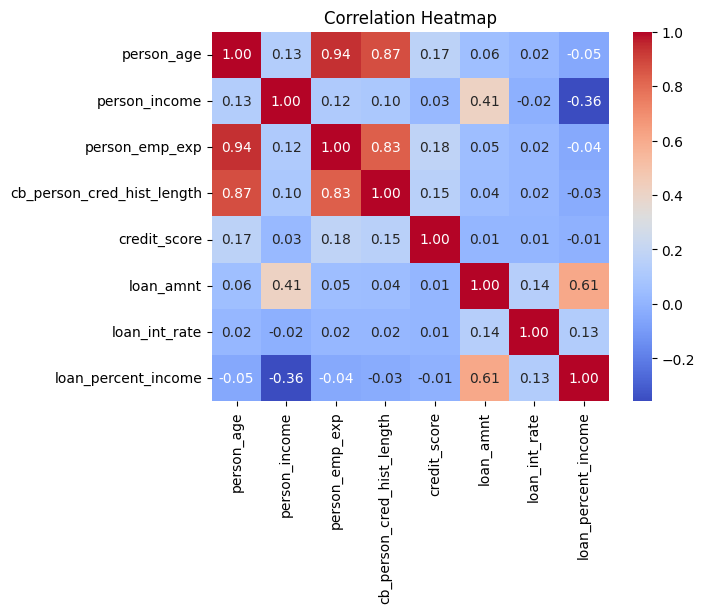

In [21]:
correlation_matrix = df1[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [22]:
df1['loan_status'].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [23]:
df1.head()

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0             0.0   
1        21.0        female      High School        12282.0             0.0   
2        25.0        female      High School        12438.0             3.0   
3        23.0        female         Bachelor        79753.0             0.0   
4        24.0          male           Master        66135.0             1.0   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT  23093.125    PERSONAL          16.02   
1                   OWN   1000.000   EDUCATION          11.14   
2              MORTGAGE   5500.000     MEDICAL          12.87   
3                  RENT  23093.125     MEDICAL          15.23   
4                  RENT  23093.125     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.37                         3.0         561.0   
1                 0.08                         2.0         504.0   
2                 0.37                         3.0         635.0   
3                 0.37                         2.0         675.0   
4                 0.37                         4.0         586.0   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

In [24]:
df2 = df1

In [25]:
df2['person_education'] = df2['person_education'].map({"High School": 1, "Associate": 2, "Bachelor": 3, 'Master': 4, 'Doctorate': 5}) 

In [26]:
df2.head()

person_age person_gender  person_education  person_income  person_emp_exp  \
0        22.0        female                 4        71948.0             0.0   
1        21.0        female                 1        12282.0             0.0   
2        25.0        female                 1        12438.0             3.0   
3        23.0        female                 3        79753.0             0.0   
4        24.0          male                 4        66135.0             1.0   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT  23093.125    PERSONAL          16.02   
1                   OWN   1000.000   EDUCATION          11.14   
2              MORTGAGE   5500.000     MEDICAL          12.87   
3                  RENT  23093.125     MEDICAL          15.23   
4                  RENT  23093.125     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.37                         3.0         561.0   
1                 0.08                         2.0         504.0   
2                 0.37                         3.0         635.0   
3                 0.37                         2.0         675.0   
4                 0.37                         4.0         586.0   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

In [27]:
# Select the training features that needs to be encoded
df2_to_encode = df2[['person_gender', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']]

# Display first few rows
df2_to_encode.head()

person_gender person_home_ownership loan_intent  \
0        female                  RENT    PERSONAL   
1        female                   OWN   EDUCATION   
2        female              MORTGAGE     MEDICAL   
3        female                  RENT     MEDICAL   
4          male                  RENT     MEDICAL   

  previous_loan_defaults_on_file  
0                             No  
1                            Yes  
2                             No  
3                             No  
4                             No

In [28]:
# Set up an encoder for one-hot encoding the categorical features
df2_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [29]:
# Fit and transform the training features using the encoder
df2_encoded = df2_encoder.fit_transform(df2_to_encode)

In [30]:
# Get feature names from encoder
df2_encoder.get_feature_names_out()

array(['person_gender_male', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL',
       'loan_intent_VENTURE', 'previous_loan_defaults_on_file_Yes'],
      dtype=object)

In [31]:
# Display first few rows of encoded training features
df2_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [32]:
# Place encoded training features (which is currently an array) into a dataframe
df2_encoded_df = pd.DataFrame(data=df2_encoded, columns=df2_encoder.get_feature_names_out())

# Display first few rows
df2_encoded_df.head()

person_gender_male  person_home_ownership_OTHER  person_home_ownership_OWN  \
0                 0.0                          0.0                        0.0   
1                 0.0                          0.0                        1.0   
2                 0.0                          0.0                        0.0   
3                 0.0                          0.0                        0.0   
4                 1.0                          0.0                        0.0   

   person_home_ownership_RENT  loan_intent_EDUCATION  \
0                         1.0                    0.0   
1                         0.0                    1.0   
2                         0.0                    0.0   
3                         1.0                    0.0   
4                         1.0                    0.0   

   loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
0                          0.0                  0.0                   1.0   
1                          0.0                  0.0                   0.0   
2                          0.0                  1.0                   0.0   
3                          0.0                  1.0                   0.0   
4                          0.0                  1.0                   0.0   

   loan_intent_VENTURE  previous_loan_defaults_on_file_Yes  
0                  0.0                                 0.0  
1                  0.0                                 1.0  
2                  0.0                                 0.0  
3                  0.0                                 0.0  
4                  0.0                                 0.0

In [33]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
df2_final = pd.concat([df2.drop(columns=['person_gender', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file'])
                           .reset_index(drop=True), df2_encoded_df], axis=1)

# Display first few rows
df2_final.head()

person_age  person_education  person_income  person_emp_exp  loan_amnt  \
0        22.0                 4        71948.0             0.0  23093.125   
1        21.0                 1        12282.0             0.0   1000.000   
2        25.0                 1        12438.0             3.0   5500.000   
3        23.0                 3        79753.0             0.0  23093.125   
4        24.0                 4        66135.0             1.0  23093.125   

   loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0          16.02                 0.37                         3.0   
1          11.14                 0.08                         2.0   
2          12.87                 0.37                         3.0   
3          15.23                 0.37                         2.0   
4          14.27                 0.37                         4.0   

   credit_score  loan_status  person_gender_male  person_home_ownership_OTHER  \
0         561.0            1                 0.0                          0.0   
1         504.0            0                 0.0                          0.0   
2         635.0            1                 0.0                          0.0   
3         675.0            1                 0.0                          0.0   
4         586.0            1                 1.0                          0.0   

   person_home_ownership_OWN  person_home_ownership_RENT  \
0                        0.0                         1.0   
1                        1.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         1.0   
4                        0.0                         1.0   

   loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  \
0                    0.0                          0.0                  0.0   
1                    1.0                          0.0                  0.0   
2                    0.0                          0.0                  1.0   
3                    0.0                          0.0                  1.0   
4                    0.0                          0.0                  1.0   

   loan_intent_PERSONAL  loan_intent_VENTURE  \
0                   1.0                  0.0   
1                   0.0                  0.0   
2                   0.0                  0.0   
3                   0.0                  0.0   
4                   0.0                  0.0   

   previous_loan_defaults_on_file_Yes  
0                                 0.0  
1                                 1.0  
2                                 0.0  
3                                 0.0  
4                                 0.0

In [34]:
# Use resampling to create class balance in the outcome variable, if needed

# Identify data points from majority and minority classes
data_majority = df2_final[df2_final['loan_status'] == 0]
data_minority = df2_final[df2_final['loan_status'] == 1]

# Upsample the minority class (which is "verified")
data_minority_upsampled = resample(data_minority,
                                 replace=True,                 # to sample with replacement
                                 n_samples=len(data_majority), # to match majority class
                                 random_state=20)               # to create reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

# Display new class counts
data_upsampled["loan_status"].value_counts()

loan_status
0    35000
1    35000
Name: count, dtype: int64

In [35]:
data_upsampled.head()

person_age  person_education  person_income  person_emp_exp  loan_amnt  \
0        21.0                 1      12282.000             0.0   1000.000   
1        23.0                 2     138998.000             0.0  23093.125   
2        23.0                 4     168667.125             5.0  23093.125   
3        23.0                 3     144943.000             0.0  23093.125   
4        25.0                 3     168667.125             0.0  23093.125   

   loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0          11.14                 0.08                         2.0   
1           7.90                 0.25                         4.0   
2          10.65                 0.05                         3.0   
3           7.90                 0.24                         4.0   
4           7.49                 0.18                         4.0   

   credit_score  loan_status  person_gender_male  person_home_ownership_OTHER  \
0         504.0            0                 0.0                          0.0   
1         583.0            0                 0.0                          0.0   
2         670.0            0                 0.0                          0.0   
3         663.0            0                 1.0                          0.0   
4         684.0            0                 1.0                          0.0   

   person_home_ownership_OWN  person_home_ownership_RENT  \
0                        1.0                         0.0   
1                        0.0                         1.0   
2                        0.0                         0.0   
3                        0.0                         1.0   
4                        0.0                         1.0   

   loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  \
0                    1.0                          0.0                  0.0   
1                    1.0                          0.0                  0.0   
2                    0.0                          0.0                  0.0   
3                    1.0                          0.0                  0.0   
4                    0.0                          0.0                  0.0   

   loan_intent_PERSONAL  loan_intent_VENTURE  \
0                   0.0                  0.0   
1                   0.0                  0.0   
2                   0.0                  0.0   
3                   0.0                  0.0   
4                   0.0                  1.0   

   previous_loan_defaults_on_file_Yes  
0                                 1.0  
1                                 0.0  
2                                 1.0  
3                                 0.0  
4                                 1.0

In [36]:
# Select outcome variable
y = data_upsampled["loan_status"]

In [37]:
X = data_upsampled.drop('loan_status', axis=1)

In [38]:
X.head()

person_age  person_education  person_income  person_emp_exp  loan_amnt  \
0        21.0                 1      12282.000             0.0   1000.000   
1        23.0                 2     138998.000             0.0  23093.125   
2        23.0                 4     168667.125             5.0  23093.125   
3        23.0                 3     144943.000             0.0  23093.125   
4        25.0                 3     168667.125             0.0  23093.125   

   loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0          11.14                 0.08                         2.0   
1           7.90                 0.25                         4.0   
2          10.65                 0.05                         3.0   
3           7.90                 0.24                         4.0   
4           7.49                 0.18                         4.0   

   credit_score  person_gender_male  person_home_ownership_OTHER  \
0         504.0                 0.0                          0.0   
1         583.0                 0.0                          0.0   
2         670.0                 0.0                          0.0   
3         663.0                 1.0                          0.0   
4         684.0                 1.0                          0.0   

   person_home_ownership_OWN  person_home_ownership_RENT  \
0                        1.0                         0.0   
1                        0.0                         1.0   
2                        0.0                         0.0   
3                        0.0                         1.0   
4                        0.0                         1.0   

   loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  \
0                    1.0                          0.0                  0.0   
1                    1.0                          0.0                  0.0   
2                    0.0                          0.0                  0.0   
3                    1.0                          0.0                  0.0   
4                    0.0                          0.0                  0.0   

   loan_intent_PERSONAL  loan_intent_VENTURE  \
0                   0.0                  0.0   
1                   0.0                  0.0   
2                   0.0                  0.0   
3                   0.0                  0.0   
4                   0.0                  1.0   

   previous_loan_defaults_on_file_Yes  
0                                 1.0  
1                                 0.0  
2                                 1.0  
3                                 0.0  
4                                 1.0

In [39]:
# Separate into train, validate, test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_tr_rf, X_val_rf, y_tr_rf, y_val_rf = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)

In [40]:
# Get shape of each training and testing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((52500, 19), (17500, 19), (52500,), (17500,))

In [41]:
y_train.value_counts(normalize=True)

loan_status
0    0.502133
1    0.497867
Name: proportion, dtype: float64

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [43]:
# Construct a logistic regression model and fit it to the training set
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_scaled, y_train)

In [44]:
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

In [45]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred_log = log_clf.predict(X_test_scaled)

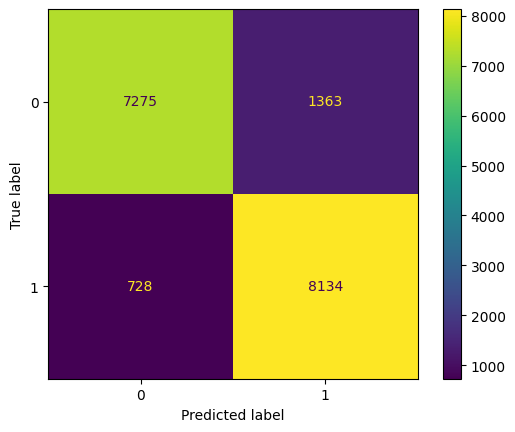

In [46]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred_log, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

In [47]:
# Create classification report for logistic regression model
target_labels = ["Approved", "Disapproved"]
print(classification_report(y_test, y_pred_log, target_names=target_labels))

pc_score_log = metrics.precision_score(y_test, y_pred_log)
rc_score_log = metrics.recall_score(y_test, y_pred_log)
f1_score_log = metrics.f1_score(y_test, y_pred_log)
ac_score_log = metrics.accuracy_score(y_test, y_pred_log)

              precision    recall  f1-score   support

    Approved       0.91      0.84      0.87      8638
 Disapproved       0.86      0.92      0.89      8862

    accuracy                           0.88     17500
   macro avg       0.88      0.88      0.88     17500
weighted avg       0.88      0.88      0.88     17500



In [48]:
# Assign `nb` to be the appropriate implementation of Naive Bayes.

nb = naive_bayes.GaussianNB()

# Fit the model on your training data.

nb.fit(X_train, y_train)

# Apply your model to predict on your test data. Call this "y_pred".

y_pred_nb = nb.predict(X_test)

In [49]:
# Print your accuracy score.
print('accuracy score:'), print(metrics.accuracy_score(y_test, y_pred_nb))

# Print your precision score.
print('precision score:'), print(metrics.precision_score(y_test, y_pred_nb))

# Print your recall score.
print('recall score:'), print(metrics.recall_score(y_test, y_pred_nb))

# Print your f1 score.
print('f1 score:'), print(metrics.f1_score(y_test, y_pred_nb))

pc_score_nb = metrics.precision_score(y_test, y_pred_nb)
rc_score_nb = metrics.recall_score(y_test, y_pred_nb)
f1_score_nb = metrics.f1_score(y_test, y_pred_nb)
ac_score_nb = metrics.accuracy_score(y_test, y_pred_nb)

accuracy score:
0.7806285714285714
precision score:
0.75672084227742
recall score:
0.8353644775445723
f1 score:
0.7941002949852507


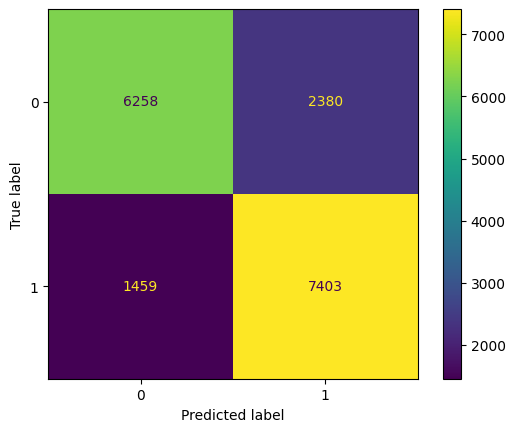

In [50]:
# Construct and display your confusion matrix.
cm_nb = metrics.confusion_matrix(y_test, y_pred_nb)

# Create the display for your confusion matrix.

disp_nb = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb.classes_)

# Plot the visual in-line.

### YOUR CODE HERE ###

disp_nb.plot()

In [51]:
decision_tree = DecisionTreeClassifier(random_state=0)

decision_tree.fit(X_train, y_train)

dt_pred = decision_tree.predict(X_test)

In [52]:
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred))
f1_score_dt = metrics.f1_score(y_test, dt_pred)
rc_score_dt = metrics.recall_score(y_test, dt_pred)
pc_score_dt = metrics.precision_score(y_test, dt_pred)
ac_score_dt = metrics.accuracy_score(y_test, dt_pred)

Decision Tree
Accuracy: 0.956229
Precision: 0.930547
Recall: 0.987249
F1 Score: 0.958060


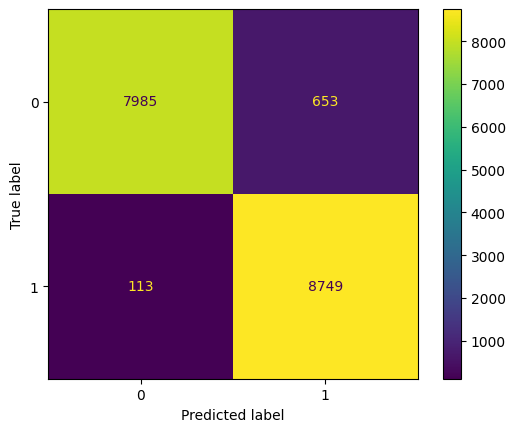

In [53]:
cm_dt = metrics.confusion_matrix(y_test, dt_pred, labels = decision_tree.classes_)
disp_dt = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_dt,display_labels = decision_tree.classes_)
disp_dt.plot()

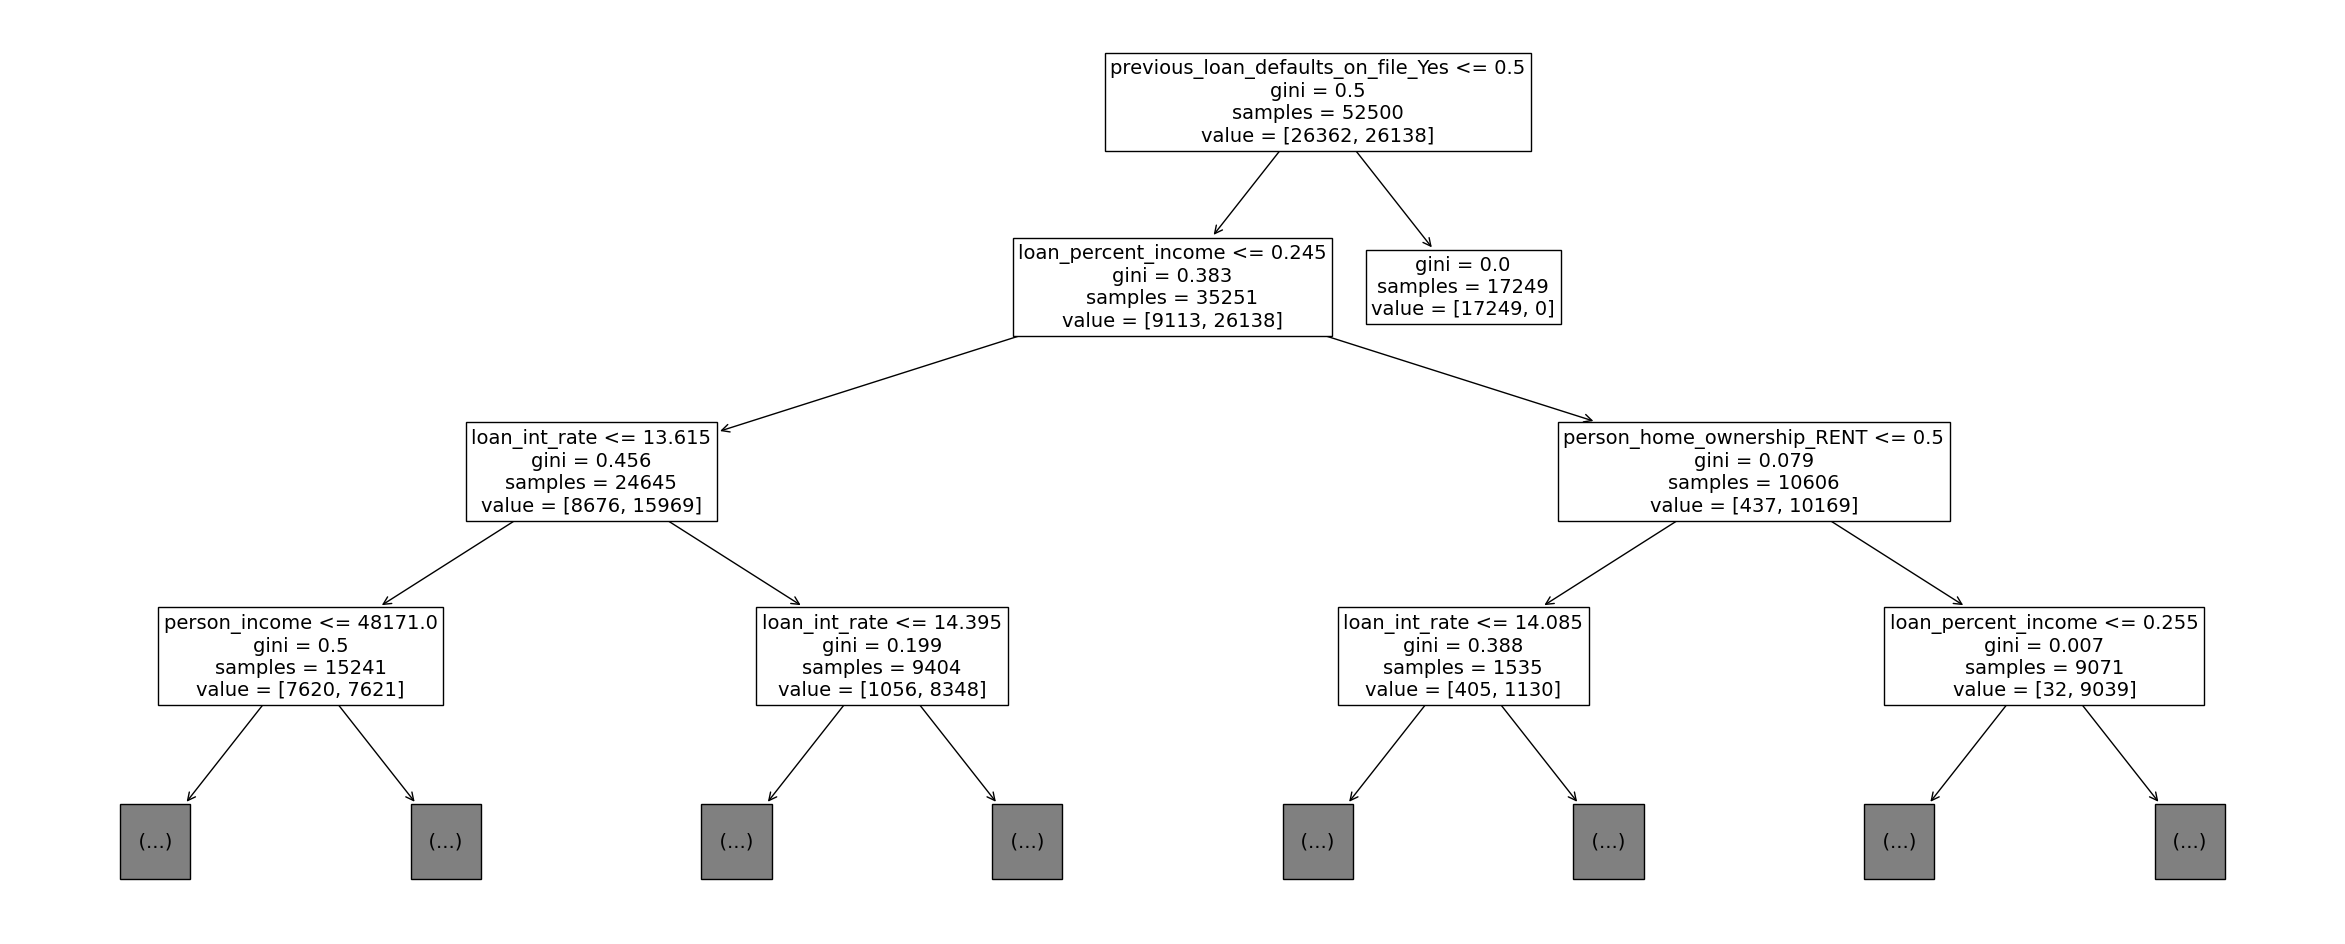

In [54]:
plt.figure(figsize=(30,12))
plot_tree(decision_tree, max_depth=3, fontsize=14, feature_names=X_train.columns);

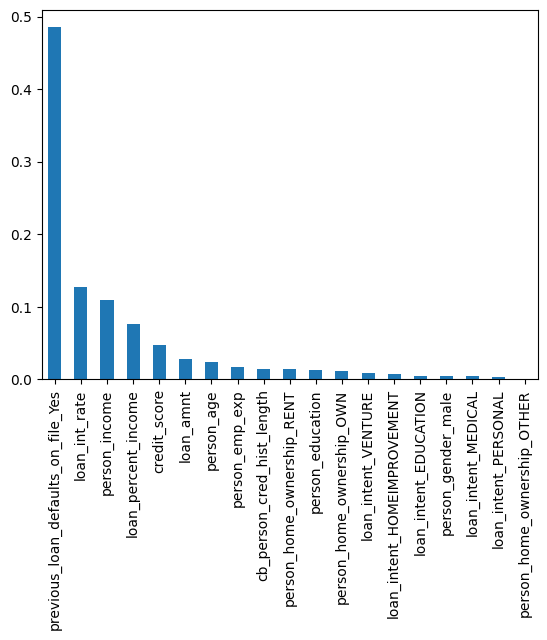

In [55]:
importances = decision_tree.feature_importances_

forest_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

In [56]:
# Determine set of hyperparameters.

cv_params_rf = {'n_estimators' : [50,100], 
              'max_depth' : [10,50],        
              'min_samples_leaf' : [0.5,1], 
              'min_samples_split' : [0.001, 0.01],
              'max_features' : ["sqrt"], 
              'max_samples' : [.5,.9]}

In [57]:
# Create list of split indices.

split_index = [0 if x in X_val_rf.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [58]:
# Instantiate model.

rf = RandomForestClassifier(random_state=0)

In [59]:
# Search over specified parameters.

rf_val = GridSearchCV(rf, cv_params_rf, cv=custom_split, refit='f1', n_jobs = -1, verbose = 1)

In [60]:
%%time

# Fit the model.

rf_val.fit(X_train, y_train)

Fitting 1 folds for each of 32 candidates, totalling 32 fits
CPU times: total: 4.98 s
Wall time: 30.5 s


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1,  0, ..., -1, -1])),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='f1', verbose=1)

In [61]:
# Obtain optimal parameters.

rf_val.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 50}

In [62]:
# Use optimal parameters on GridSearchCV.

rf_opt = RandomForestClassifier(n_estimators = 50, max_depth = 50, 
                                min_samples_leaf = 1, min_samples_split = 0.001,
                                max_features="sqrt", max_samples = 0.9, random_state = 0)

In [63]:
# Fit the optimal model.

rf_opt.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_samples=0.9, min_samples_split=0.001,
                       n_estimators=50, random_state=0)

In [64]:
# Predict on test set.

y_pred_rf = rf_opt.predict(X_test)

pc_test_rf = metrics.precision_score(y_test, y_pred_rf)
rc_test_rf = metrics.recall_score(y_test, y_pred_rf)
f1_test_rf = metrics.f1_score(y_test, y_pred_rf)
ac_test_rf = metrics.accuracy_score(y_test, y_pred_rf)

In [65]:
# Create table of results.

table = pd.DataFrame({'Model': ["Tuned Random Forest"],
                        'F1':  [f1_test_rf],
                        'Recall': [rc_test_rf],
                        'Precision': [pc_test_rf],
                        'Accuracy': [ac_test_rf]
                      }
                    )
table

Model        F1    Recall  Precision  Accuracy
0  Tuned Random Forest  0.927353  0.944933   0.910415  0.925029

In [66]:
# Define xgb to be your XGBClassifier.

xgb = XGBClassifier(objective='binary:logistic', random_state=0)

In [67]:
cv_params_xgb = {'max_depth': [4, 6],
               'min_child_weight': [3, 5],
               'learning_rate': [0.1, 0.2, 0.3],
               'n_estimators': [5,10,15],
               'subsample': [0.7],
               'colsample_bytree': [0.7]
               }

In [68]:
# Define your criteria as `scoring`.

scoring = ['accuracy', 'precision', 'recall', 'f1']

In [69]:
# Construct your GridSearch.

xgb_cv = GridSearchCV(xgb,
                      cv_params_xgb,
                      scoring = scoring,
                      cv = 5,
                      refit = 'f1'
                     )

In [70]:
%%time
# fit the GridSearch model to training data
xgb_cv = xgb_cv.fit(X_train, y_train)
xgb_cv

CPU times: total: 5min 49s
Wall time: 26.5 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 6],
                         'min_child_weight': [3, 5],
                         'n_estimators': [5, 10, 15], 'subsample': [0.7]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [71]:
# Apply your model to predict on your test data. Call this output "y_pred".
y_pred_xgb = xgb_cv.predict(X_test)

In [72]:
# 1. Print your accuracy score.
ac_score_xgb = metrics.accuracy_score(y_test, y_pred_xgb)
print('accuracy score:', ac_score_xgb)

# 2. Print your precision score.
pc_score_xgb = metrics.precision_score(y_test, y_pred_xgb)
print('precision score:', pc_score_xgb)

# 3. Print your recall score.
rc_score_xgb = metrics.recall_score(y_test, y_pred_xgb)
print('recall score:', rc_score_xgb)

# 4. Print your f1 score.
f1_score_xgb = metrics.f1_score(y_test, y_pred_xgb)
print('f1 score:', f1_score_xgb)

accuracy score: 0.9009714285714285
precision score: 0.8945213060320975
recall score: 0.9119837508463101
f1 score: 0.9031681287366597


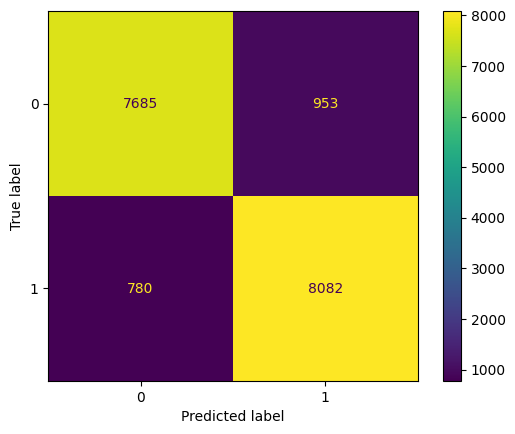

In [73]:
# Construct and display your confusion matrix.

# Construct the confusion matrix for your predicted and test values.
cm_xgb = metrics.confusion_matrix(y_test, y_pred_xgb)

# Create the display for your confusion matrix.
disp_xgb = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb_cv.classes_)

# Plot the visual in-line.
disp_xgb.plot()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

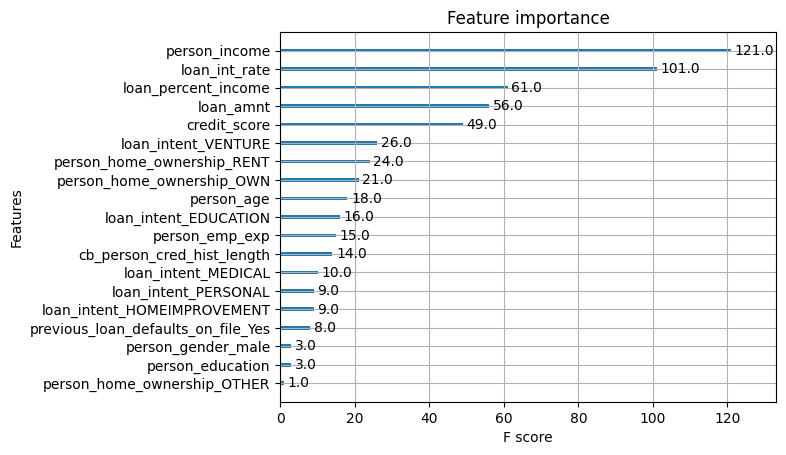

In [74]:
# Plot the relative feature importance of the predictor variables in your model.
plot_importance(xgb_cv.best_estimator_)

In [75]:
pd.DataFrame({'Model': ['Logistic Regression', 'Naives Bayes', 'Decision Tree', 'Random Forest' ,"Tuned XGBoost"],
                      'F1': [f1_score_log, f1_score_nb, f1_score_dt, f1_test_rf, f1_score_xgb],
                      'Recall': [rc_score_log, rc_score_nb, rc_score_dt, rc_test_rf, rc_score_xgb],
                      'Precision': [pc_score_log, pc_score_nb, pc_score_dt, pc_test_rf, pc_score_xgb],
                      'Accuracy': [ac_score_log, ac_score_nb, ac_score_dt, ac_test_rf, ac_score_xgb]
                     }
                    )

Model        F1    Recall  Precision  Accuracy
0  Logistic Regression  0.886105  0.917852   0.856481  0.880514
1         Naives Bayes  0.794100  0.835364   0.756721  0.780629
2        Decision Tree  0.958060  0.987249   0.930547  0.956229
3        Random Forest  0.927353  0.944933   0.910415  0.925029
4        Tuned XGBoost  0.903168  0.911984   0.894521  0.900971